In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Text(0.5, 1.0, '')

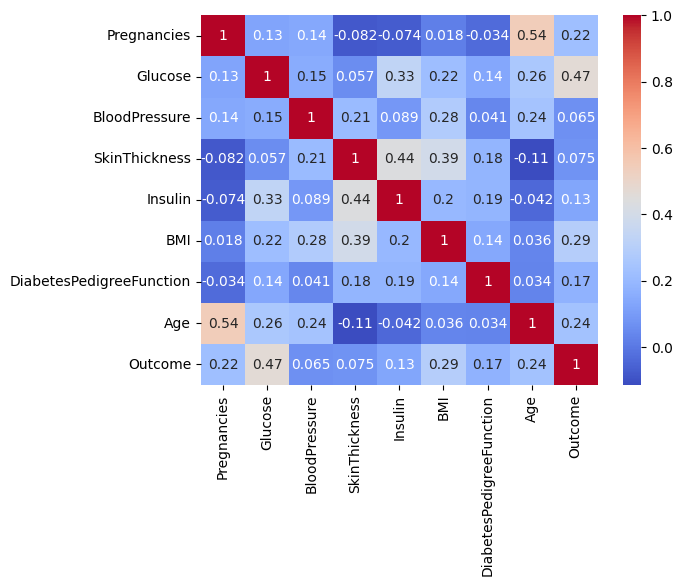

In [6]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("")

In [7]:
zero_counts = (df.drop("Outcome", axis=1) == 0).sum()
print(zero_counts)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [8]:
cols = ["Glucose", "BloodPressure", "BMI"]
df[cols] = df[cols].replace(0, np.nan)
df = df.dropna()

In [18]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0             35        0  33.6   
1              1     85.0           66.0             29        0  26.6   
2              8    183.0           64.0              0        0  23.3   
3              1     89.0           66.0             23       94  28.1   
4              0    137.0           40.0             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0             48      180  32.9   
764            2    122.0           70.0             27        0  36.8   
765            5    121.0           72.0             23      112  26.2   
766            1    126.0           60.0              0        0  30.1   
767            1     93.0           70.0             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 0.63502182  0.84993279 -0.03237751 ...  0.16456174  0.45842062
   1.41607523]
 [-0.85286102 -1.20026207 -0.51737031 ... -0.85226209 -0.37269083
  -0.19994691]
 [ 1.23017496  1.98892994 -0.67903458 ... -1.33162189  0.59392792
  -0.11489311]
 ...
 [ 0.33744525 -0.02872215 -0.03237751 ... -0.9103663  -0.69188581
  -0.28500071]
 [-0.85286102  0.13399173 -1.00236311 ... -0.34385017 -0.37871338
   1.16091384]
 [-0.85286102 -0.93991986 -0.19404178 ... -0.30027201 -0.48109667
  -0.88037728]]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
model = svm.SVC(kernel="linear")
model.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [13]:
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[89 13]
 [16 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       102
           1       0.68      0.63      0.65        43

    accuracy                           0.80       145
   macro avg       0.76      0.75      0.76       145
weighted avg       0.80      0.80      0.80       145

Accuracy Score: 0.8


In [14]:
input_data = (9, 100, 70, 5, 6, 31.6, 0.291, 40)
# convert tuple into array
np_array_data = np.asarray(input_data)

print(np_array_data)


[  9.    100.     70.      5.      6.     31.6     0.291  40.   ]


In [15]:
# reshape(1, -1)
reshaped_data = np_array_data.reshape(1, -1)
print(reshaped_data)

[[  9.    100.     70.      5.      6.     31.6     0.291  40.   ]]


In [16]:
# zscore
std_data = scaler.transform(reshaped_data)
print(std_data)

[[ 1.52775153 -0.71212043 -0.19404178 -1.04589036 -0.67126201 -0.12595935
  -0.55336724  0.56553726]]


c:\Users\TUAN NGOC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [17]:
pred = model.predict(std_data)
print(pred)

if pred[0] == 0:
    print("Not Diabetic!")
else:
    print("Diabetic!")

[0]
Not Diabetic!
